In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

challange.json: 0.00B [00:00, ?B/s]

simple.json: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/21840 [00:00<?, ? examples/s]

Distribusi sentiment:
sentiment
positive    0.342491
negative    0.342033
neutral     0.315476
Name: proportion, dtype: float64
Accuracy: 0.980540293040293

Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.97      0.98      1494
     neutral       0.99      0.99      0.99      1378
    positive       0.97      0.97      0.97      1496

    accuracy                           0.98      4368
   macro avg       0.98      0.98      0.98      4368
weighted avg       0.98      0.98      0.98      4368



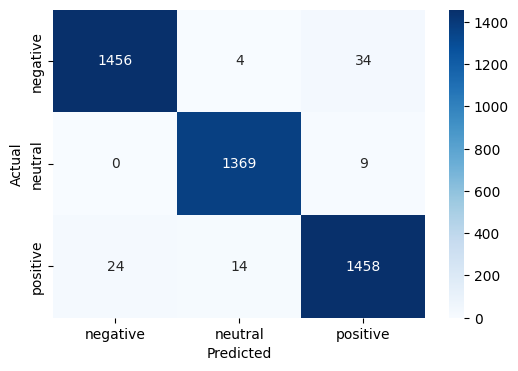

In [2]:
# %% [markdown]
# # Sentiment Analysis — E- Commerce Reviews (Bahasa Indonesia)

# %% 1. Import libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


# %% 2. Load dataset langsung dari Hugging Face
!pip install datasets --quiet
from datasets import load_dataset

ds = load_dataset("AIbnuHibban/e-commerce-sentiment-bahasa-indonesia")
df = ds["train"].to_pandas()
df.head()

# %% 3. Preprocessing sederhana
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r"http\S+|www\S+", "", s)     # hapus url
    s = re.sub(r"[^a-z0-9\\s]", " ", s)       # tetap huruf + angka + spasi
    s = re.sub(r"\s+", " ", s).strip()        # hapus spasi berlebih
    return s

df["text_clean"] = df["comment"].apply(clean_text)

# Optional: lihat distribusi label
print("Distribusi sentiment:")
print(df["sentiment"].value_counts(normalize=True))

# %% 4. Siapkan data & split
X = df["text_clean"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# %% 5. Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words=None, max_df=0.9, min_df=5, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# %% 6. Training model — Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# %% 7. Evaluasi
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
